In [1]:
from scipy.io import wavfile
from pesq import pesq
import os
from os import listdir
from pydub import AudioSegment
from scipy.io.wavfile import read, write
from IPython.display import Audio
import matplotlib.pyplot as plt
from pydub import AudioSegment, effects 
import random
from pydub.silence import split_on_silence
import numpy as np
import tqdm
import pandas as pd
import time

import pickle
import subprocess

import matplotlib.pyplot as plt
import numpy as np
import wave

In [2]:
from pyAudioAnalysis import audioBasicIO as aIO
from pyAudioAnalysis import audioSegmentation as aS
from pydub import AudioSegment, silence
import librosa


In [3]:
# this function to merge the silence 
def merge(sil):
    ans=[]
    check=False
    for i in range(1,len(sil)):
        tmp=sil[i-1][1]
        if tmp==sil[i][0]:
            ans.append((sil[i-1][0],sil[i][1]))
            check=True
        else:
            if not check:
                ans.append(sil[i-1])
            else:    
                check=False
    if ans[-1][1]!=sil[-1][1]:
        ans.append(sil[-1])
    return ans

In [4]:
# shows the sound waves
def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red') 
            plt.axvline(x=i[1], color='red')
    plt.show()

In [5]:
def detect_silence(path,time):
    command="ffmpeg -i "+path+" -af silencedetect=n=-30dB:d="+str(time)+" -f null -"
    out = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    stdout, stderr = out.communicate()
    s=stdout.decode("utf-8")
    k=s.split('[silencedetect @')
    if len(k)==1:
        #print(stderr)
        return None
        
    start,end=[],[]
    for i in range(1,len(k)):
        x=k[i].split(']')[1]
        if i%2==0:
            x=x.split('|')[0]
            x=x.split(':')[1].strip()
            end.append(float(x))
        else:
            x=x.split(':')[1]
            x=x.split('size')[0]
            x=x.replace('\r','')
            x=x.replace('\n','').strip()
            start.append(float(x))
    return list(zip(start,end))

In [6]:
files=['../WavFiles/43.wav','../WavFiles/6.wav','../WavFiles/74.wav']

[(61.2477, 66.3483), (67.3863, 78.4916)]


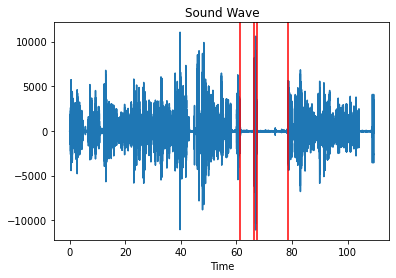

[(313.007, 359.315)]


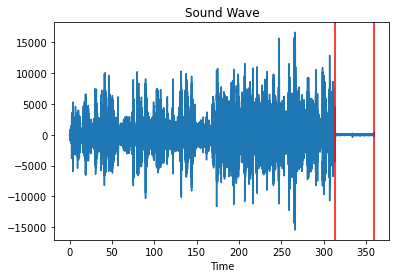

[(30.8486, 37.2661)]


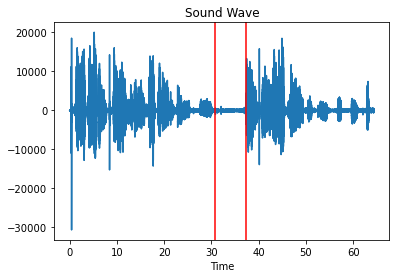

In [7]:
for file in files:
    lst=detect_silence(file,5)
    print(lst)
    if lst:
        visualize(file,lst)